# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([
    transforms.ToTensor(),               
    transforms.Normalize((0.5,), (0.5,)) 
])

# Create training set and define training dataloader
## YOUR CODE HERE ##
train_dataset = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True, num_workers=4)

# Create test set and define test dataloader
## YOUR CODE HERE ##
test_dataset = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False, num_workers=4)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

I chose transforms.ToTensor() to convert images to PyTorch tensors and transforms.Normalize() to scale pixel values to the range [-1, 1], promoting faster convergence during training and improving model stability. These transforms are common preprocessing steps for neural networks, aiding in better gradient flow and learning.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

0


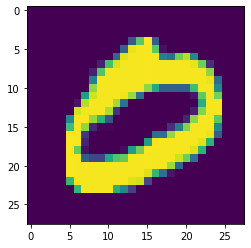

6


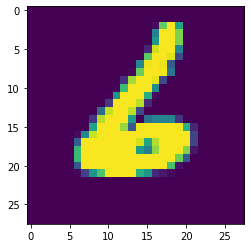

2


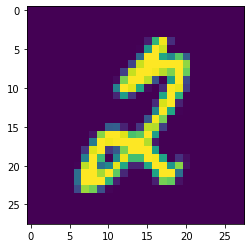

4


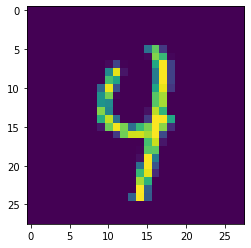

4


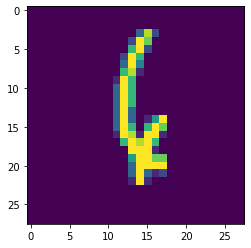

In [5]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
## YOUR CODE HERE ##
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
## YOUR CODE HERE ##
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
## YOUR CODE HERE ##
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 10

train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0

    for i, data in enumerate(train_loader):
        inputs, labels = data

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()

    train_accuracy = train_correct / len(train_loader.dataset)
    train_loss /= len(train_loader)
    print(f'Epoch {epoch + 1} training accuracy: {train_accuracy:.2%}, training loss: {train_loss:.5f}')
    train_loss_history.append(train_loss)

Epoch 1 training accuracy: 88.17%, training loss: 0.39399
Epoch 2 training accuracy: 94.49%, training loss: 0.18681
Epoch 3 training accuracy: 95.81%, training loss: 0.13536
Epoch 4 training accuracy: 96.57%, training loss: 0.11026
Epoch 5 training accuracy: 97.06%, training loss: 0.09409
Epoch 6 training accuracy: 97.38%, training loss: 0.08237
Epoch 7 training accuracy: 97.66%, training loss: 0.07300
Epoch 8 training accuracy: 97.86%, training loss: 0.06603
Epoch 9 training accuracy: 98.04%, training loss: 0.06203
Epoch 10 training accuracy: 98.29%, training loss: 0.05231


Plot the training loss (and validation loss/accuracy, if recorded).

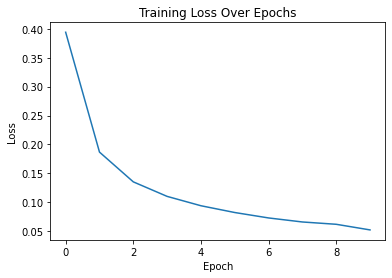

In [9]:
## YOUR CODE HERE ##
plt.plot(train_loss_history, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [10]:
## YOUR CODE HERE ##
model.eval()
val_loss = 0.0
val_correct = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()

val_accuracy = val_correct / len(test_loader.dataset)
val_loss /= len(test_loader)
print(f'Epoch {epoch + 1} validation accuracy: {val_accuracy:.2%}, validation loss: {val_loss:.5f}')
val_loss_history.append(val_loss)

Epoch 10 validation accuracy: 97.05%, validation loss: 0.09459


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [11]:
## YOUR CODE HERE ##
num_epochs = 10

new_lr = 0.0001
optimizer = optim.Adam(model.parameters(), lr=new_lr)

train_loss_history = list()
val_loss_history = list()

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()

    train_accuracy = train_correct / len(train_loader.dataset)
    train_loss /= len(train_loader)
    print(f'Epoch {epoch + 1} training accuracy: {train_accuracy:.2%}, training loss: {train_loss:.5f}')
    train_loss_history.append(train_loss)

    model.eval()
    val_loss = 0.0
    val_correct = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs.data, 1)
            val_correct += (preds == labels).sum().item()
            val_loss += loss.item()

    val_accuracy = val_correct / len(test_loader.dataset)
    val_loss /= len(test_loader)
    print(f'Epoch {epoch + 1} validation accuracy: {val_accuracy:.2%}, validation loss: {val_loss:.5f}')
    val_loss_history.append(val_loss)

Epoch 1 training accuracy: 99.20%, training loss: 0.02714
Epoch 1 validation accuracy: 97.93%, validation loss: 0.06817
Epoch 2 training accuracy: 99.38%, training loss: 0.02249
Epoch 2 validation accuracy: 97.99%, validation loss: 0.06955
Epoch 3 training accuracy: 99.41%, training loss: 0.02074
Epoch 3 validation accuracy: 97.94%, validation loss: 0.06831
Epoch 4 training accuracy: 99.49%, training loss: 0.01937
Epoch 4 validation accuracy: 98.04%, validation loss: 0.06728
Epoch 5 training accuracy: 99.49%, training loss: 0.01827
Epoch 5 validation accuracy: 97.95%, validation loss: 0.06902
Epoch 6 training accuracy: 99.56%, training loss: 0.01712
Epoch 6 validation accuracy: 98.05%, validation loss: 0.06919
Epoch 7 training accuracy: 99.57%, training loss: 0.01620
Epoch 7 validation accuracy: 98.11%, validation loss: 0.06907
Epoch 8 training accuracy: 99.63%, training loss: 0.01537
Epoch 8 validation accuracy: 97.93%, validation loss: 0.07006
Epoch 9 training accuracy: 99.64%, train

## Saving your model
Using `torch.save`, save your model for future loading.

In [12]:
## YOUR CODE HERE ##
torch.save(model.state_dict(), 'model.pth')